## Environment and Imports

In [1]:
# Checking Your Python Environment
import sys
import numpy as np
import scipy
import sklearn
import matplotlib
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# scikit-learn pereptron and adaline implementations
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# print active python version
print(f"Python version active:", sys.version)

# print active python interpreter
print(f"Python interpreter active:", sys.executable)

# print numpy version
print(f"numpy version:", np.__version__)

# print scipy version
print(f"scipy version:", scipy.__version__)

# print matplotlib version
print(f"matplotlib version:", matplotlib.__version__)

# print sklearn version
print(f"sklearn version:", sklearn.__version__)

# print pandas version
print(f"pandas version:", pd.__version__)

Python version active: 3.9.23 (main, Jun  5 2025, 13:25:08) [MSC v.1929 64 bit (AMD64)]
Python interpreter active: c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\python.exe
numpy version: 1.21.2
scipy version: 1.7.0
matplotlib version: 3.4.3
sklearn version: 1.0
pandas version: 1.3.2


### Import files

In [ ]:
file_path = r'project_adult.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
    print(f"\n********************* \nDataset Shape: {df.shape} \n********************* \nDataset Columns: \n{df.columns}\n********************* \nData Description: \n{df.describe()} \n********************* \nDoes Data Contain Null Values \n{df.isnull().all()}")
    print(f"\n********************* \n Counts of Response Variables: \n {df.iloc[:,4].value_counts()}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

file_path = r'project_validation_inputs.csv'

try:
    validation_df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
    print(f"\n********************* \nDataset Shape: {validation_df.shape} \n********************* \nDataset Columns: \n{validation_df.columns}\n********************* \nData Description: \n{validation_df.describe()} \n********************* \nDoes Data Contain Null Values \n{validation_df.isnull().all()}")
    print(f"\n********************* \n Counts of Response Variables: \n {validation_df.iloc[:,4].value_counts()}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'Data\project_adult.csv'. First 5 rows:
   Unnamed: 0  age         workclass  fnlwgt     education  education-num  \
0        5514   33         Local-gov  198183     Bachelors             13   
1       19777   36           Private   86459     Assoc-voc             11   
2       10781   58  Self-emp-not-inc  203039           9th              5   
3       32240   21           Private  180190     Assoc-voc             11   
4        9876   27           Private  279872  Some-college             10   

       marital-status       occupation   relationship   race     sex  \
0       Never-married   Prof-specialty  Not-in-family  White  Female   
1  Married-civ-spouse  Exec-managerial        Husband  White    Male   
2           Separated     Craft-repair  Not-in-family  White    Male   
3  Married-civ-spouse  Farming-fishing        Husband  White    Male   
4            Divorced    Other-service  Not-in-family  White    Male   

   capital-gain  capital-loss  hours-per-wee

In [3]:
# from pyomo.environ import *
# import os
# import pandas as pd
# from google.colab import files
# import io

# file_name = "project_adult.csv"
# file_name_2 = "project_validation_inputs.csv"

# # Remove existing file to prevent renaming
# if os.path.exists(file_name):
#     os.remove(file_name)
# if os.path.exists(file_name_2):
#   os.remove(file_name_2)

# # Upload the file
# df_all = files.upload()

# df = pd.read_csv(io.BytesIO(df_all['project_adult.csv'])) #replace your_file.csv with your file name
# validation_df = pd.read_csv(io.BytesIO(df_all['project_validation_inputs.csv']))

# df.head()
# validation_df.head()

## Cleaning Data (Missing values, encoding categorical, standardize numerical)

Including validation with the normal train/test set

In [4]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [6]:
validation_df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')

In [7]:
# Handle missing values
df.dropna(inplace=True)
df = df.iloc[:, 1:]
validation_df.dropna(inplace=True)
validation_df = validation_df.iloc[:, 1:]

In [8]:
y = df['income']
X = df.drop('income', axis=1)
validation_X = validation_df

In [9]:
y = y.map({'<=50K': 0, '>50K': 1})

In [10]:
# Scale Numeric
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
validation_scaler = StandardScaler()
validation_X[numeric_cols] = validation_scaler.fit_transform(validation_X[numeric_cols])

In [ ]:
#X.mean()

In [ ]:
print(validation_X.shape)
print(X.shape)

(6513, 14)
(26048, 14)


In [11]:
# Encode Categorical
# Concatenate train + validation
combined = pd.concat([X, validation_X], axis=0)

# One-hot encode together so they get the same dummy columns
combined = pd.get_dummies(combined, columns=[
    'workclass','education','marital-status',
    'occupation','relationship','race','sex','native-country'
])

# Split back into X and validation_X
X = combined.iloc[:len(X), :]
validation_X = combined.iloc[len(X):, :]

# Convert to numpy
X = X.to_numpy().astype(float)
validation_X = validation_X.to_numpy().astype(float)

In [12]:
X.max()

13.684139089246393

In [13]:
print(validation_X.shape)
print(X.shape)

(6513, 108)
(26048, 108)


## Creating Perceptron Models

#### Perceptron from In Class Activity

In [14]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [15]:
# ### Training the perceptron model
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)

### Epoch Analysis

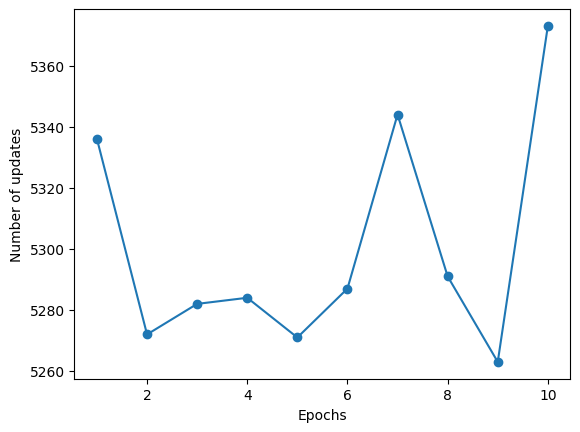

In [16]:
# Plot miscalssificaiotn error for each epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

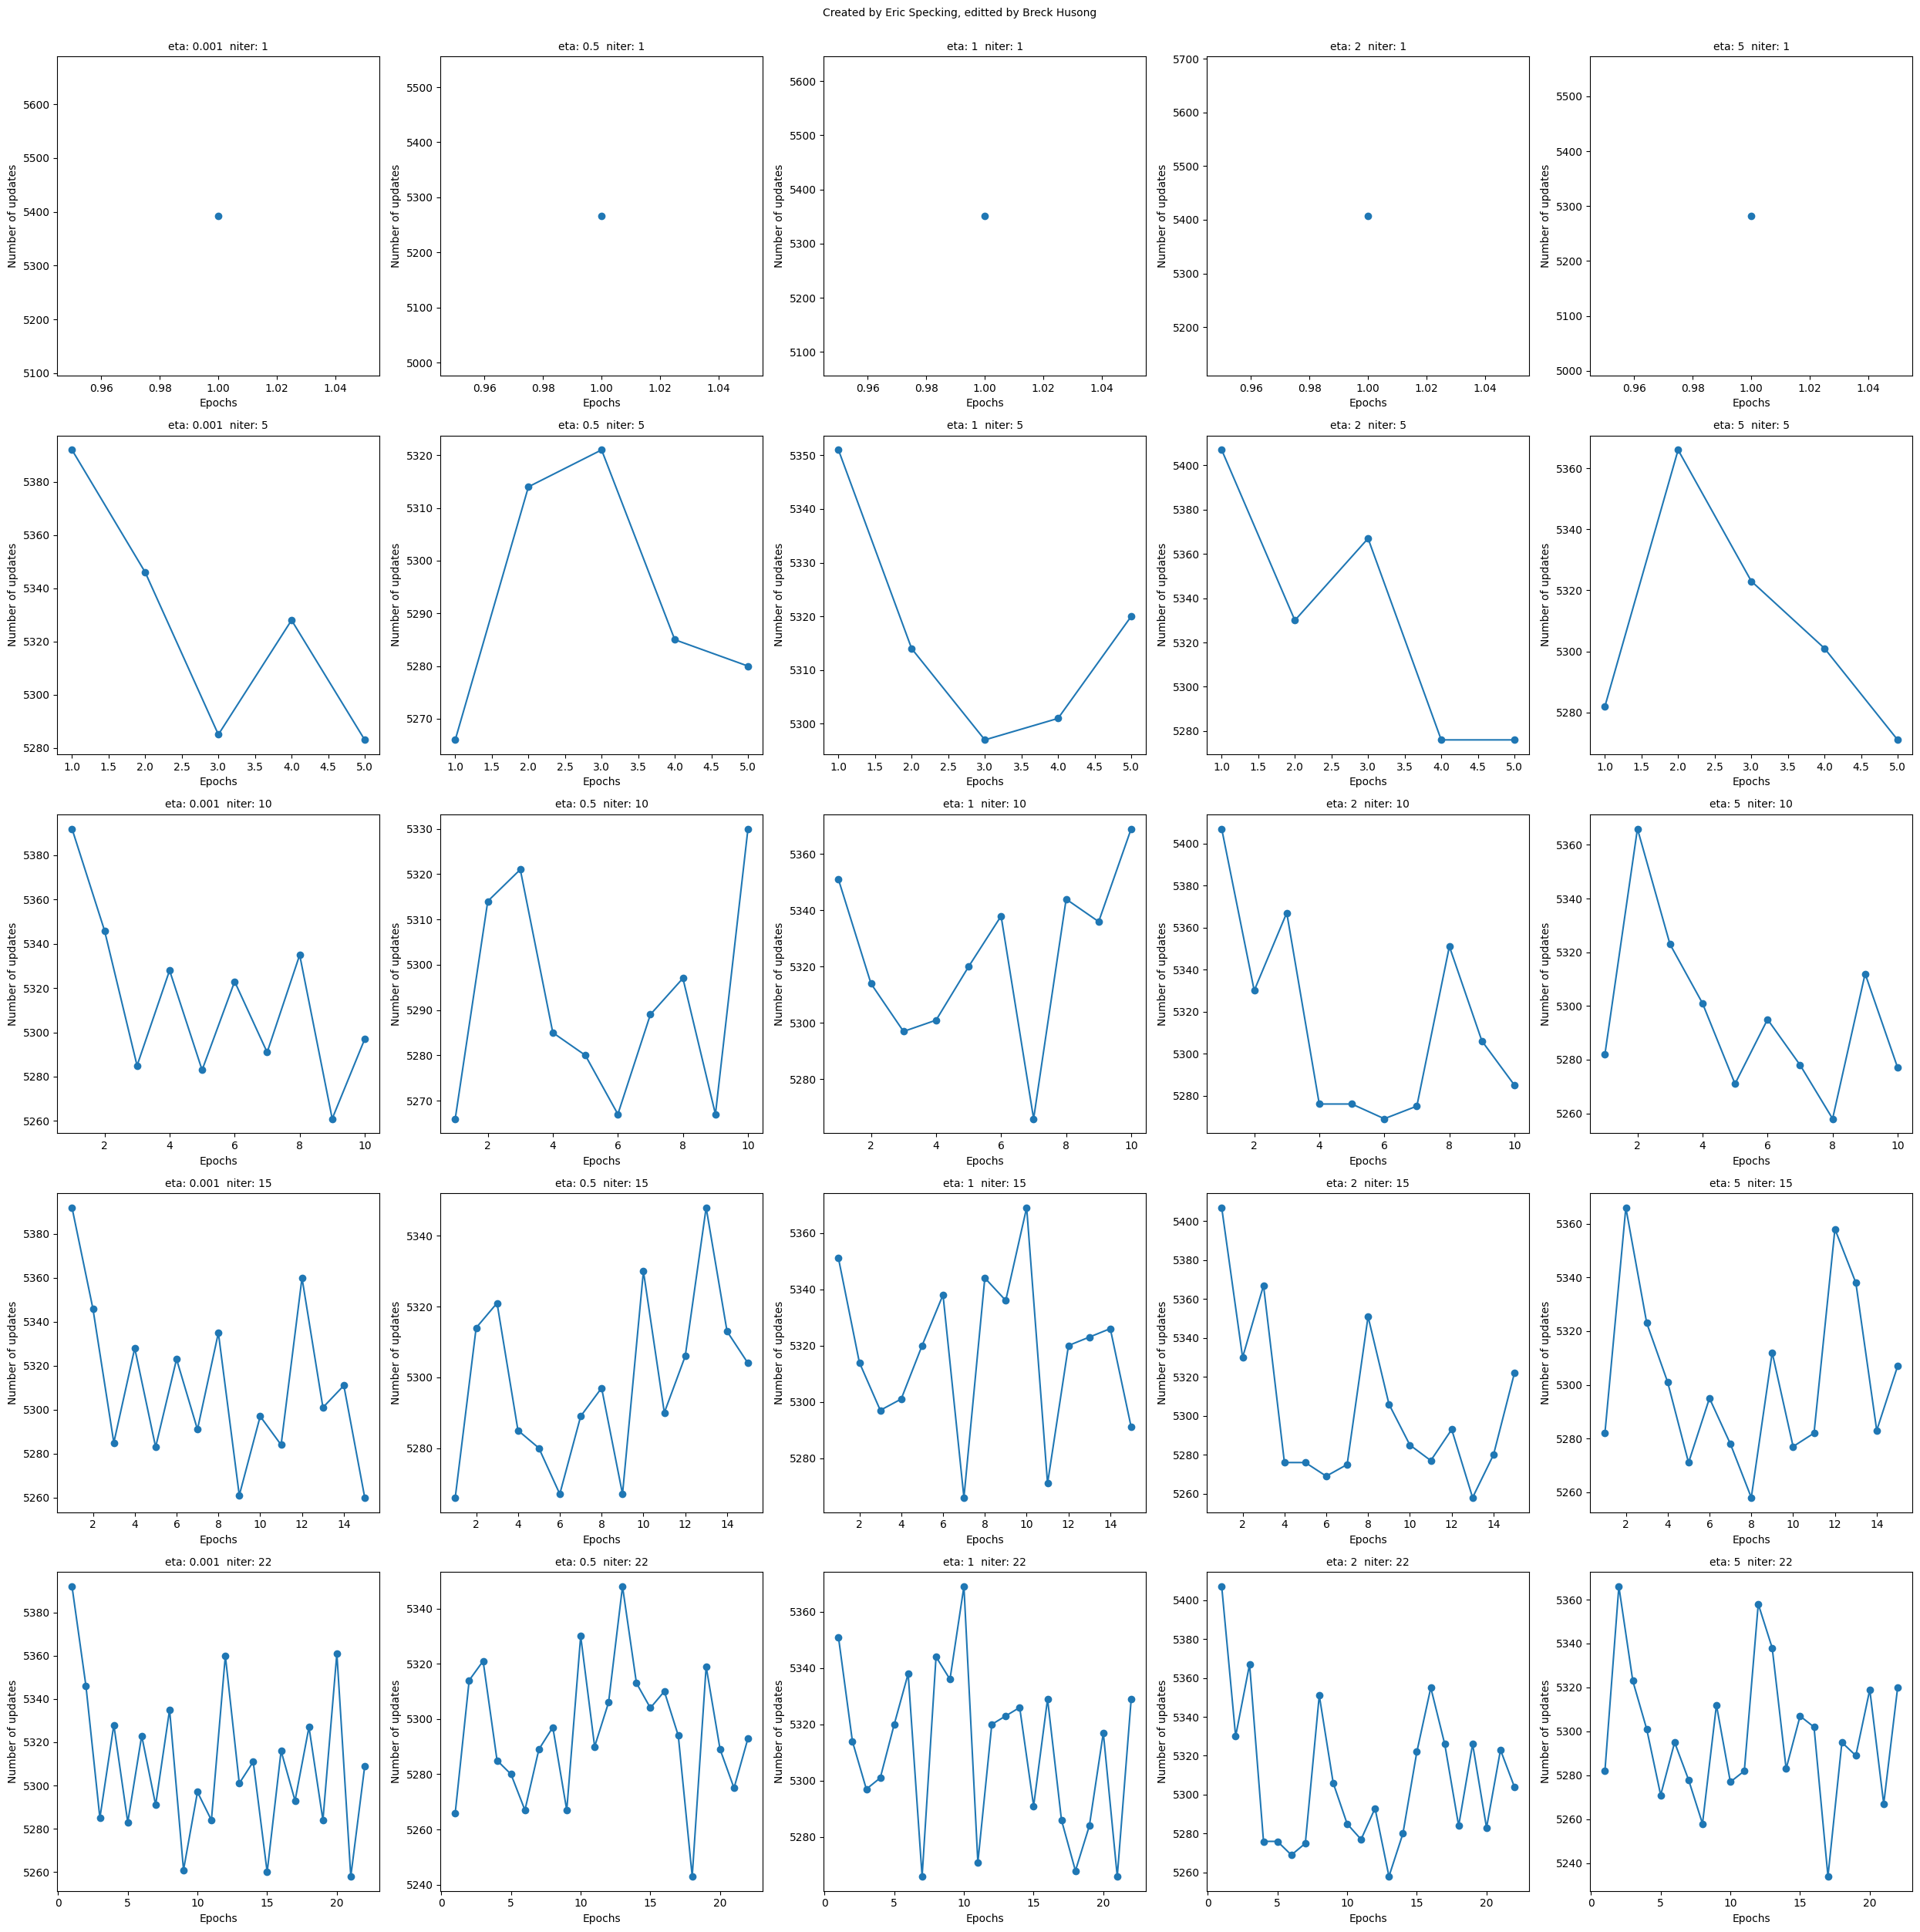

In [17]:
# Train Perceptron and find good value of eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [0.001, .5, 1, 2, 5] # Previously [0, 0.25, 0.5, 0.75, 1]
list_niter = [1, 5, 10, 15, 22]

fig.suptitle("Created by Eric Specking, editted by Breck Husong", fontsize=10, y=1)

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ppn = Perceptron(n_iter=n_temp, eta= e_temp).fit(X, y)
        ax[j, i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Number of updates', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)

plt.tight_layout()
plt.show()

For Perceptron, n_iter=10 and eta=0.001 seems to be the best, with ~5280 misclassifications, which is ~80% accurate

## Adaline Models (have to redo some data preprocessing)

In [18]:
# split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### AdalineGD

In [19]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

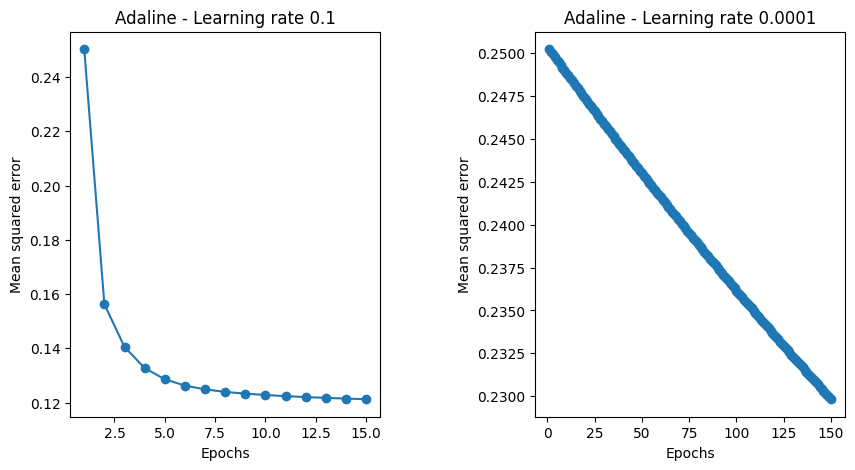

In [20]:
# Train adaptive linear neuron with AdalineGD with 2 different learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X_train, y_train)
ax[0].plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=150, eta=0.0001).fit(X_train, y_train)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.5)

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [21]:
# predict on trained AdalineGD models
y_pred =ada1.predict(X_test)
print(f"Adaline accuracy with n_iter {15} and eta {0.1}: {accuracy_score(y_test, y_pred):.4f}")

y_pred =ada2.predict(X_test)
print(f"Adaline accuracy with n_iter {15} and eta {0.0001}: {accuracy_score(y_test, y_pred):.4f}")

Adaline accuracy with n_iter 15 and eta 0.1: 0.8342
Adaline accuracy with n_iter 15 and eta 0.0001: 0.7685


Adaline accuracy with n_iter 1 and eta 0.1: 0.7701
Adaline accuracy with n_iter 1 and eta 0.01: 0.7685
Adaline accuracy with n_iter 1 and eta 0.001: 0.7685
Adaline accuracy with n_iter 1 and eta 0.0001: 0.7685
Adaline accuracy with n_iter 1 and eta 1e-05: 0.7685
Adaline accuracy with n_iter 5 and eta 0.1: 0.8240
Adaline accuracy with n_iter 5 and eta 0.01: 0.7685
Adaline accuracy with n_iter 5 and eta 0.001: 0.7685
Adaline accuracy with n_iter 5 and eta 0.0001: 0.7685
Adaline accuracy with n_iter 5 and eta 1e-05: 0.7685
Adaline accuracy with n_iter 10 and eta 0.1: 0.8336
Adaline accuracy with n_iter 10 and eta 0.01: 0.7685
Adaline accuracy with n_iter 10 and eta 0.001: 0.7685
Adaline accuracy with n_iter 10 and eta 0.0001: 0.7685
Adaline accuracy with n_iter 10 and eta 1e-05: 0.7685
Adaline accuracy with n_iter 15 and eta 0.1: 0.8342
Adaline accuracy with n_iter 15 and eta 0.01: 0.7714
Adaline accuracy with n_iter 15 and eta 0.001: 0.7685
Adaline accuracy with n_iter 15 and eta 0.0001:

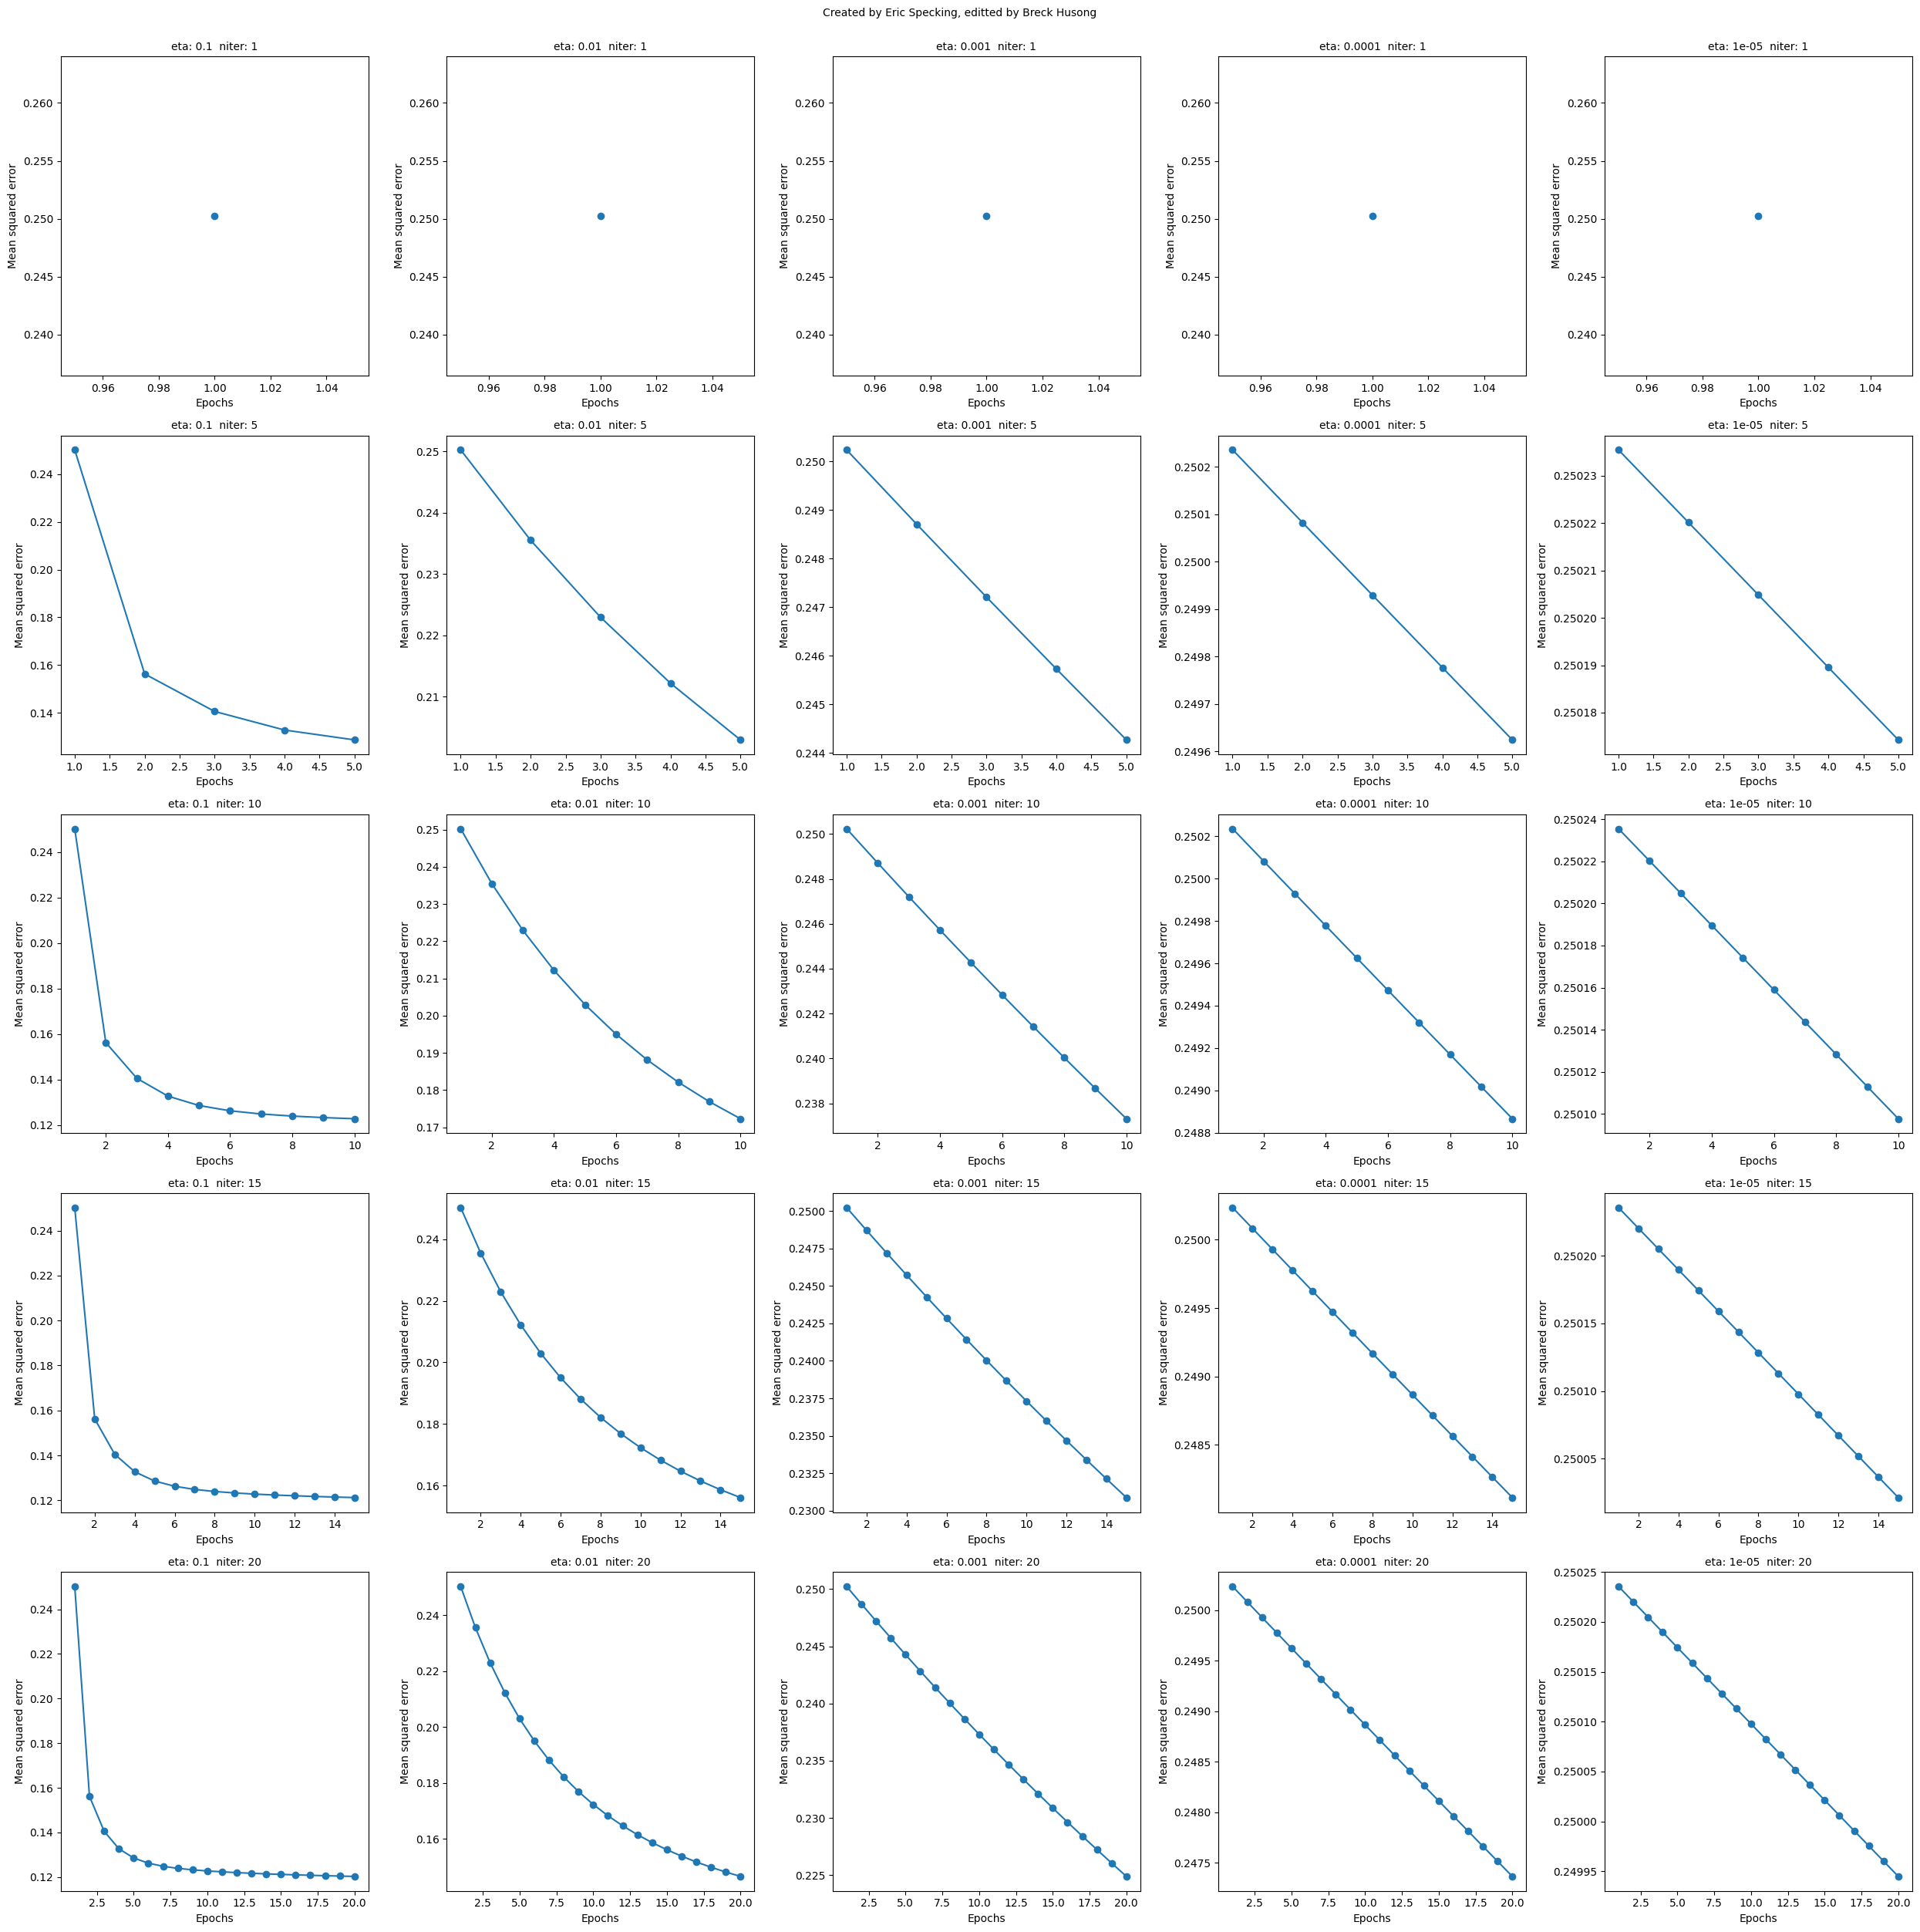

In [22]:
# looking at parameters eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [.1, 0.01, 0.001, 0.0001, 0.00001]
list_niter = [1, 5, 10, 15, 20]

fig.suptitle("Created by Eric Specking, editted by Breck Husong", fontsize=10, y=1)

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ada = AdalineGD(n_iter=n_temp, eta= e_temp).fit(X_train, y_train)
        ax[j, i].plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Mean squared error', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)

        y_pred = ada.predict(X_test)
        print(f"Adaline accuracy with n_iter {n_temp} and eta {e_temp}: {accuracy_score(y_test, y_pred):.4f}")

plt.tight_layout()
plt.show()

### AdalineSDG

In [23]:
X_train[0].max()

1.0

In [24]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


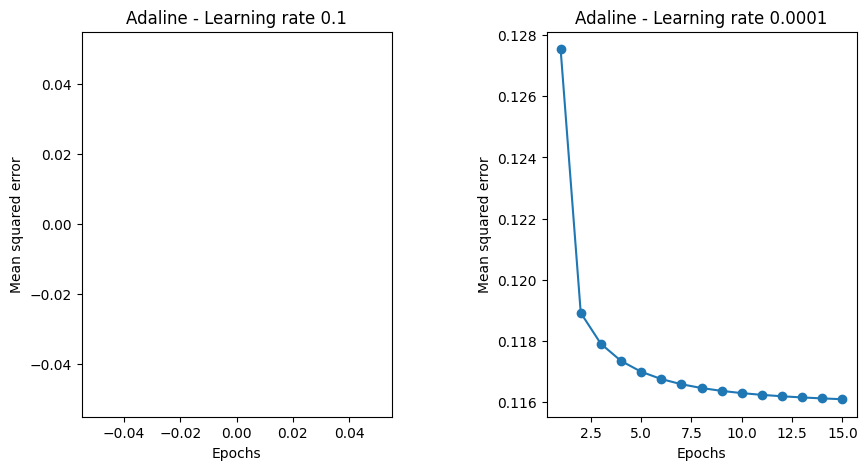

In [25]:
# Train adaptive linear neuron with AdalineSGD with 2 different learning rates.....without shuffling
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ada1 = AdalineSGD(n_iter=15, eta=0.1, shuffle=False).fit(X_train, y_train)
ax[0].plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineSGD(n_iter=15, eta=0.0001, shuffle=False).fit(X_train, y_train)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.5)

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [26]:
# predict on trained AdalineSGD models with shuffle FALSE
y_pred =ada1.predict(X_test)
print(f"Adaline accuracy with n_iter 15 and eta 0.1: {accuracy_score(y_test, y_pred):.4f}")

y_pred =ada2.predict(X_test)
print(f"Adaline accuracy with n_iter 15 and eta 0.0001: {accuracy_score(y_test, y_pred):.4f}")

Adaline accuracy with n_iter 15 and eta 0.1: 0.7685
Adaline accuracy with n_iter 15 and eta 0.0001: 0.8428


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 1 and eta 0.1: 0.7685
Adaline accuracy with n_iter 1 and eta 0.01: 0.5019
Adaline accuracy with n_iter 1 and eta 0.001: 0.8397
Adaline accuracy with n_iter 1 and eta 0.0001: 0.8370
Adaline accuracy with n_iter 1 and eta 1e-05: 0.7806


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 5 and eta 0.1: 0.7685
Adaline accuracy with n_iter 5 and eta 0.01: 0.5019
Adaline accuracy with n_iter 5 and eta 0.001: 0.8418
Adaline accuracy with n_iter 5 and eta 0.0001: 0.8415
Adaline accuracy with n_iter 5 and eta 1e-05: 0.8322


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 10 and eta 0.1: 0.7685


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 10 and eta 0.01: 0.4981
Adaline accuracy with n_iter 10 and eta 0.001: 0.8417
Adaline accuracy with n_iter 10 and eta 0.0001: 0.8430
Adaline accuracy with n_iter 10 and eta 1e-05: 0.8392


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 15 and eta 0.1: 0.7685


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 15 and eta 0.01: 0.5019
Adaline accuracy with n_iter 15 and eta 0.001: 0.8417
Adaline accuracy with n_iter 15 and eta 0.0001: 0.8426
Adaline accuracy with n_iter 15 and eta 1e-05: 0.8413


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Adaline accuracy with n_iter 20 and eta 0.1: 0.7685


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\1644968680.py:91: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)


Adaline accuracy with n_iter 20 and eta 0.01: 0.7685
Adaline accuracy with n_iter 20 and eta 0.001: 0.8415
Adaline accuracy with n_iter 20 and eta 0.0001: 0.8434
Adaline accuracy with n_iter 20 and eta 1e-05: 0.8438


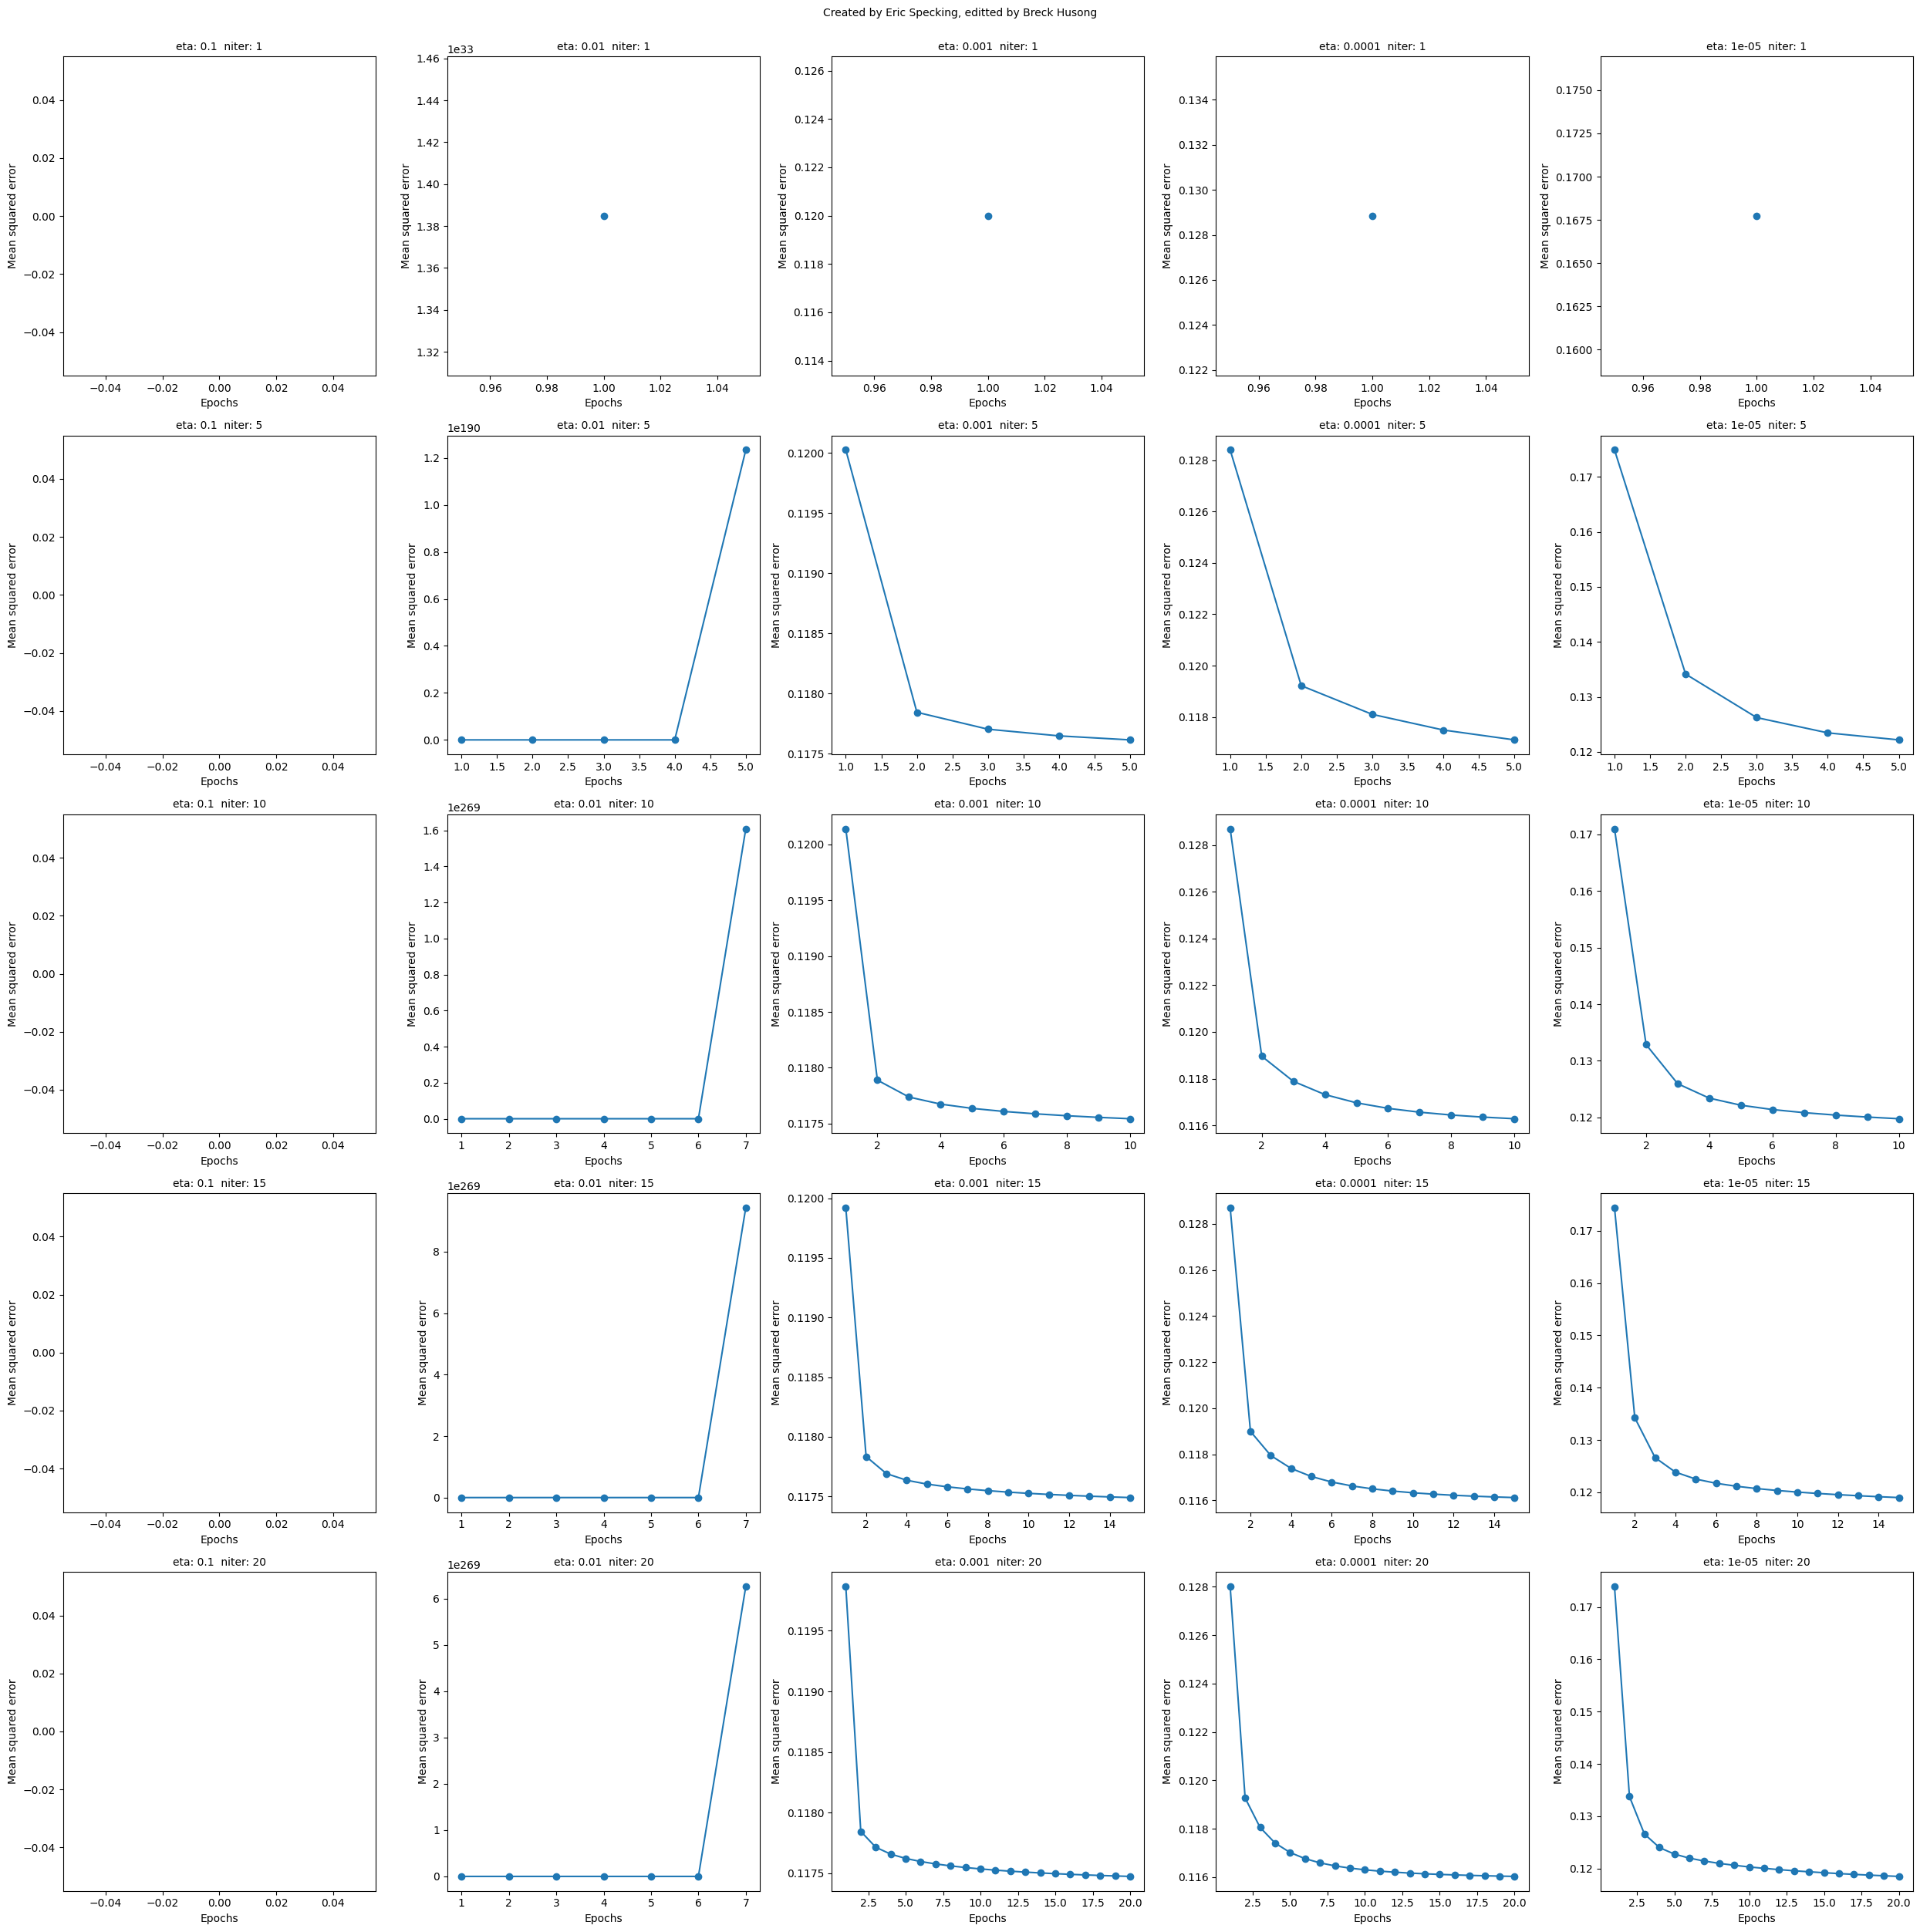

In [27]:
# looking at parameters eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [.1, 0.01, 0.001, 0.0001, 0.00001]
list_niter = [1, 5, 10, 15, 20]

fig.suptitle("Created by Eric Specking, editted by Breck Husong", fontsize=10, y=1)

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ada = AdalineSGD(n_iter=n_temp, eta= e_temp,shuffle=False).fit(X_train, y_train)
        ax[j, i].plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Mean squared error', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)

        y_pred = ada.predict(X_test)
        print(f"Adaline accuracy with n_iter {n_temp} and eta {e_temp}: {accuracy_score(y_test, y_pred):.4f}")

plt.tight_layout()
plt.show()

For AdalineSDG, n_iters=20 and eta=.0001 seems to have the best mean squared error of ~0.116

### Validation Analysis

In [28]:
validation_ada = AdalineSGD(n_iter=20, eta=.0001,shuffle=False).fit(X_train, y_train)
validation_ada_preds = validation_ada.predict(validation_X)

## SKLearn Implementations

In [29]:
# Assumption:  This code assumes you have already clean, processed, and split a data set.
'''
Input Data Required:
X_train = cleaned, processed input data for training prediction models
y_train = response variable associated with X_train; truth values
X_test = cleaned, processed input data for testing prediction model created on training dataset
y_test = response variable associated with X_test; truth values

Note: Current order of rows ensure y_train = X_train and y_test = X_test, but if you sort and remove rows this association changes.
'''
# Scikit-learn Perceptron
sk_ppn = SklearnPerceptron(eta0=0.001, max_iter=10, random_state=42)
sk_ppn.fit(X_train, y_train)
sk_y_pred_ppn = sk_ppn.predict(X_test)
print(f"Scikit-learn Perceptron accuracy: {accuracy_score(y_test, sk_y_pred_ppn):.4f}")

# Scikit-learn Adaline (using SGDClassifier with 'log_loss' is closer, but 'perceptron' is available)
# For Adaline (which uses GD), SGDClassifier with 'hinge' loss is a good proxy, as it's a linear classifier with regularization
sk_ada = SGDClassifier(loss='perceptron', eta0=0.0001, learning_rate='constant', max_iter=20, random_state=42)
sk_ada.fit(X_train, y_train)
sk_y_pred_ada = sk_ada.predict(X_test)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy: {accuracy_score(y_test, sk_y_pred_ada):.4f}")

Scikit-learn Perceptron accuracy: 0.7760
Scikit-learn Adaline (SGDClassifier) accuracy: 0.7839


In [30]:
### Iterate hrough different hyperparameters
list_eta = [.1, 0.01, 0.001, 0.0001, 0.00001]
list_niter = [1, 5, 10, 15, 20]

perceptron_nums = []
print("Perceptron Search")
for i in list_eta:
    for j in list_niter:
        # Scikit-learn Perceptron
        sk_ppn = SklearnPerceptron(eta0=i, max_iter=j, random_state=42)
        sk_ppn.fit(X_train, y_train)
        sk_y_pred_ppn = sk_ppn.predict(X_test)
        print(f"Scikit-learn Perceptron accuracy with n_iter={j} and eta={i}: {accuracy_score(y_test, sk_y_pred_ppn):.4f}")
        perceptron_nums.append((i,j,accuracy_score(y_test, sk_y_pred_ppn)))

print("\n\n")

adaline_nums = []
print("Adaline Search")
for i in list_eta:
    for j in list_niter:
        # Scikit-learn Adaline (using SGDClassifier with 'log_loss' is closer, but 'perceptron' is available)
        # For Adaline (which uses GD), SGDClassifier with 'hinge' loss is a good proxy, as it's a linear classifier with regularization
        sk_ada = SGDClassifier(loss='perceptron', eta0=i, learning_rate='constant', max_iter=j, random_state=42)
        sk_ada.fit(X_train, y_train)
        sk_y_pred_ada = sk_ada.predict(X_test)
        print(f"Scikit-learn Adaline (SGDClassifier) accuracy with n_iter={j} and eta={i}: {accuracy_score(y_test, sk_y_pred_ada):.4f}")
        adaline_nums.append((i,j,accuracy_score(y_test, sk_y_pred_ada)))

Perceptron Search
Scikit-learn Perceptron accuracy with n_iter=1 and eta=0.1: 0.7983
Scikit-learn Perceptron accuracy with n_iter=5 and eta=0.1: 0.7937
Scikit-learn Perceptron accuracy with n_iter=10 and eta=0.1: 0.7760
Scikit-learn Perceptron accuracy with n_iter=15 and eta=0.1: 0.7760


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Perceptron accuracy with n_iter=20 and eta=0.1: 0.7760
Scikit-learn Perceptron accuracy with n_iter=1 and eta=0.01: 0.7983
Scikit-learn Perceptron accuracy with n_iter=5 and eta=0.01: 0.7937
Scikit-learn Perceptron accuracy with n_iter=10 and eta=0.01: 0.7760
Scikit-learn Perceptron accuracy with n_iter=15 and eta=0.01: 0.7760
Scikit-learn Perceptron accuracy with n_iter=20 and eta=0.01: 0.7760
Scikit-learn Perceptron accuracy with n_iter=1 and eta=0.001: 0.7983


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

Scikit-learn Perceptron accuracy with n_iter=5 and eta=0.001: 0.7937
Scikit-learn Perceptron accuracy with n_iter=10 and eta=0.001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=15 and eta=0.001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=20 and eta=0.001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=1 and eta=0.0001: 0.7983
Scikit-learn Perceptron accuracy with n_iter=5 and eta=0.0001: 0.7937


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Perceptron accuracy with n_iter=10 and eta=0.0001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=15 and eta=0.0001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=20 and eta=0.0001: 0.7760
Scikit-learn Perceptron accuracy with n_iter=1 and eta=1e-05: 0.7983
Scikit-learn Perceptron accuracy with n_iter=5 and eta=1e-05: 0.7937
Scikit-learn Perceptron accuracy with n_iter=10 and eta=1e-05: 0.7760


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Perceptron accuracy with n_iter=15 and eta=1e-05: 0.7760
Scikit-learn Perceptron accuracy with n_iter=20 and eta=1e-05: 0.7760



Adaline Search
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=1 and eta=0.1: 0.7676
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=5 and eta=0.1: 0.8086
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=10 and eta=0.1: 0.7981


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=15 and eta=0.1: 0.7981
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=20 and eta=0.1: 0.7981
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=1 and eta=0.01: 0.8012
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=5 and eta=0.01: 0.7950
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=10 and eta=0.01: 0.7712


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=15 and eta=0.01: 0.7712
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=20 and eta=0.01: 0.7712
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=1 and eta=0.001: 0.7900
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=5 and eta=0.001: 0.7605
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=10 and eta=0.001: 0.7438


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=15 and eta=0.001: 0.7438
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=20 and eta=0.001: 0.7438
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=1 and eta=0.0001: 0.7983
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=5 and eta=0.0001: 0.8330
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=10 and eta=0.0001: 0.7839
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=15 and eta=0.0001: 0.7839


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=20 and eta=0.0001: 0.7839
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=1 and eta=1e-05: 0.7983
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=5 and eta=1e-05: 0.8036
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=10 and eta=1e-05: 0.7516
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=15 and eta=1e-05: 0.7516
Scikit-learn Adaline (SGDClassifier) accuracy with n_iter=20 and eta=1e-05: 0.7516


In [31]:
best_per = max(perceptron_nums, key=lambda x: x[2])
print("Perceptron best row:", best_per)        # (i, j, acc)
print("Perceptron best accuracy:", best_per[2])

print()

best_ada = max(adaline_nums, key=lambda x: x[2])
print("Adaline best row:", best_ada)
print("Adaline best accuracy:", best_ada[2])


Perceptron best row: (0.1, 1, 0.7982725527831094)
Perceptron best accuracy: 0.7982725527831094

Adaline best row: (0.0001, 5, 0.8330134357005758)
Adaline best accuracy: 0.8330134357005758


### Validation for SKLearn


In [32]:
# Perceptron
validation_sk_ppn = SklearnPerceptron(eta0=best_per[0], max_iter=best_per[1], random_state=42)
validation_sk_ppn.fit(X_train,y_train)
validation_sk_ppn_preds = validation_sk_ppn.predict(validation_X)
validation_sk_ppn_output = pd.DataFrame(validation_sk_ppn_preds, columns=['prediction'])
validation_sk_ppn_output.to_csv('Group_6_Perceptron_PredictedOutputs.csv', index=False)

# Adaline
validation_sk_ada = SGDClassifier(loss='perceptron', eta0=best_ada[0], learning_rate='constant', max_iter=best_ada[1], random_state=42)
validation_sk_ada.fit(X_train,y_train)
validation_sk_ada_preds = validation_sk_ada.predict(validation_X)
validation_sk_ada_output = pd.DataFrame(validation_sk_ada_preds, columns=['prediction'])
validation_sk_ada_output.to_csv('Group_6_Adaline_PredictedOutputs.csv', index=False)

c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Logistic Regression

### Imports

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


### Cleaning, Missing Values, Etc

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("project_adult.csv")

# Handle missing values
df = df.replace('?', np.nan)
df = df.dropna()

# Separate features and target
X_train = df.drop('income', axis=1)
y_train = df['income']


In [ ]:
project_validation_inputs = pd.read_csv("project_validation_inputs.csv")


### Creating Model

In [37]:
# Define the preprocessor again if needed
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train model
logreg_pipeline.fit(X_train, y_train)

# Accuracy on training data
logreg_train_preds = logreg_pipeline.predict(X_train)
logreg_train_acc = accuracy_score(y_train, logreg_train_preds)
print("Logistic Regression Train Accuracy:", round(logreg_train_acc * 100, 2), "%")

# Predict on validation inputs
logreg_val_preds = logreg_pipeline.predict(project_validation_inputs)

# Export to CSV
logreg_output = pd.DataFrame(logreg_val_preds, columns=['prediction'])
logreg_output.to_csv('Group_6_LogisticRegression_PredictedOutputs.csv', index=False)


Logistic Regression Train Accuracy: 84.91 %


## SVM Model

In [38]:
# SVM pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(max_iter=10000, random_state=42))
])

# Train SVM
svm_pipeline.fit(X_train, y_train)

# Accuracy
svm_train_preds = svm_pipeline.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_preds)
print("SVM Train Accuracy:", round(svm_train_acc * 100, 2), "%")

# Predict on validation
svm_val_preds = svm_pipeline.predict(project_validation_inputs)

# Export to CSV
svm_output = pd.DataFrame(svm_val_preds, columns=['prediction'])
svm_output.to_csv('Group_6_SVM_PredictedOutputs.csv', index=False)


SVM Train Accuracy: 84.88 %


## Decision Region

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform
X_train_scaled = preprocessor.fit_transform(X_train)

# Encode y if it's not numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


Creating decision boundary visualizations...


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\2924516388.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\2924516388.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


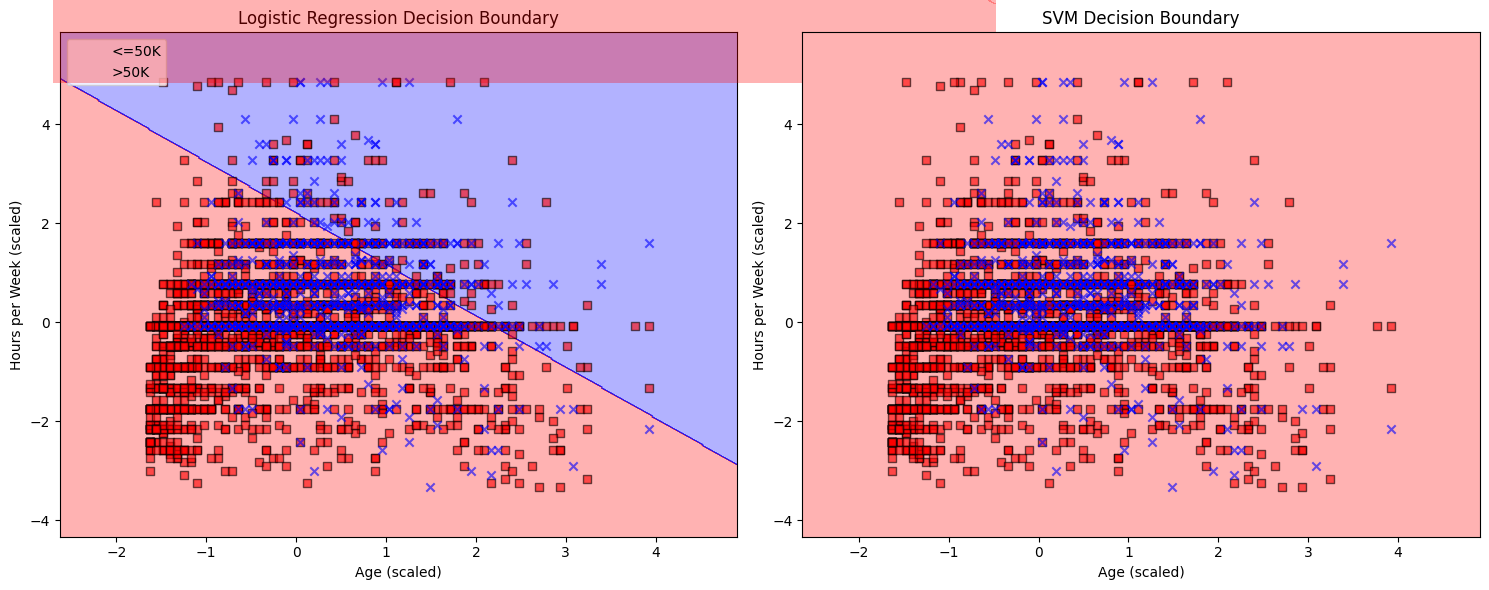

Logistic Regression (2D) Test Accuracy: 0.7521
SVM (2D) Test Accuracy: 0.7589

Alternative visualization with education-num and capital-gain:


C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\2924516388.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Breck\AppData\Local\Temp\ipykernel_14016\2924516388.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


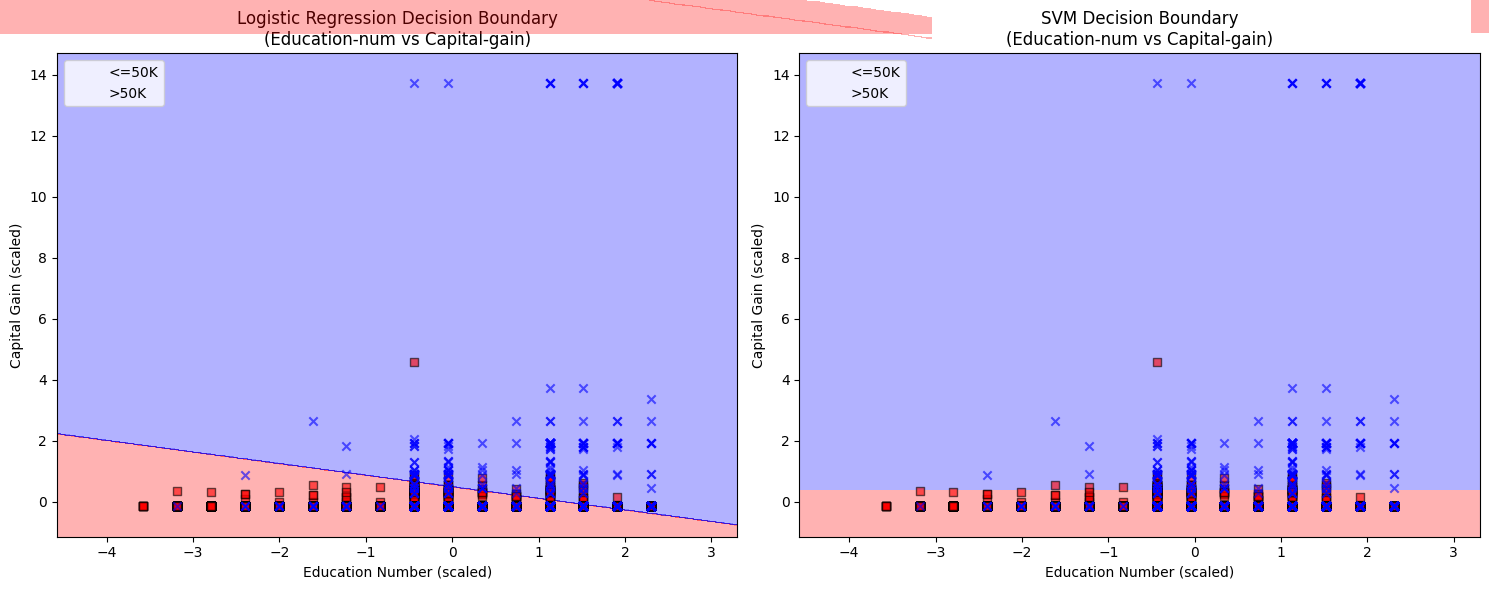

Logistic Regression (Education-Capital) Test Accuracy: 0.7997
SVM (Education-Capital) Test Accuracy: 0.7953


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plot decision regions for a 2D feature space
    """
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.6,
                   color=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')

# Add this section to your code after training your Logistic Regression and SVM models

print("Creating decision boundary visualizations...")

# Load and clean data again for 2D visualization
df_2d = pd.read_csv("Data/project_adult.csv")
df_2d = df_2d.replace('?', np.nan)
df_2d = df_2d.dropna()

# Select only 2 features for visualization
X_2d = df_2d[['age', 'hours-per-week']].values
y_2d = df_2d['income'].map({'<=50K': 0, '>50K': 1}).values

# Scale the 2D features
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Split the 2D data
from sklearn.model_selection import train_test_split
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(
    X_2d_scaled, y_2d, test_size=0.2, random_state=42)

# Train simple 2D models for visualization
logreg_2d = LogisticRegression(max_iter=1000, random_state=42)
logreg_2d.fit(X_2d_train, y_2d_train)

from sklearn.svm import SVC
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_2d_train, y_2d_train)

# Create the decision boundary plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression Decision Boundary
plt.sca(ax1)
plot_decision_regions(X_2d_test, y_2d_test, logreg_2d)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Hours per Week (scaled)')
plt.legend(['<=50K', '>50K'], loc='upper left')

# SVM Decision Boundary
plt.sca(ax2)
plot_decision_regions(X_2d_test, y_2d_test, svm_2d)
plt.title('SVM Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Hours per Week (scaled)')
#plt.legend(['<=50K', '>50K'], loc='upper left')

plt.tight_layout()
plt.show()

# Calculate and print accuracies for the 2D models
logreg_2d_acc = accuracy_score(y_2d_test, logreg_2d.predict(X_2d_test))
svm_2d_acc = accuracy_score(y_2d_test, svm_2d.predict(X_2d_test))

print(f"Logistic Regression (2D) Test Accuracy: {logreg_2d_acc:.4f}")
print(f"SVM (2D) Test Accuracy: {svm_2d_acc:.4f}")

# Optional: Try with different feature pairs
print("\n" + "="*50)
print("Alternative visualization with education-num and capital-gain:")

# Try another pair of features
X_2d_alt = df_2d[['education-num', 'capital-gain']].values
X_2d_alt_scaled = scaler_2d.fit_transform(X_2d_alt)
X_2d_alt_train, X_2d_alt_test, y_2d_alt_train, y_2d_alt_test = train_test_split(
    X_2d_alt_scaled, y_2d, test_size=0.2, random_state=42)

# Train models on alternative features
logreg_2d_alt = LogisticRegression(max_iter=1000, random_state=42)
logreg_2d_alt.fit(X_2d_alt_train, y_2d_alt_train)

svm_2d_alt = SVC(kernel='linear', random_state=42)
svm_2d_alt.fit(X_2d_alt_train, y_2d_alt_train)

# Create alternative decision boundary plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax1)
plot_decision_regions(X_2d_alt_test, y_2d_alt_test, logreg_2d_alt)
plt.title('Logistic Regression Decision Boundary\n(Education-num vs Capital-gain)')
plt.xlabel('Education Number (scaled)')
plt.ylabel('Capital Gain (scaled)')
plt.legend(['<=50K', '>50K'], loc='upper left')

plt.sca(ax2)
plot_decision_regions(X_2d_alt_test, y_2d_alt_test, svm_2d_alt)
plt.title('SVM Decision Boundary\n(Education-num vs Capital-gain)')
plt.xlabel('Education Number (scaled)')
plt.ylabel('Capital Gain (scaled)')
plt.legend(['<=50K', '>50K'], loc='upper left')

plt.tight_layout()
plt.show()

print(f"Logistic Regression (Education-Capital) Test Accuracy: {accuracy_score(y_2d_alt_test, logreg_2d_alt.predict(X_2d_alt_test)):.4f}")
print(f"SVM (Education-Capital) Test Accuracy: {accuracy_score(y_2d_alt_test, svm_2d_alt.predict(X_2d_alt_test)):.4f}")

## C Parameter Analysis

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Values of C to test
C_values = [0.01, 1.0, 100.0]

logreg_c_results = []
svm_c_results = []

print("="*50)
print("C Parameter Grid Search:")
print("="*50)

# Logistic Regression C search
print("\nLogistic Regression C Search:")
for c_val in C_values:
    logreg_c = LogisticRegression(C=c_val, max_iter=1000, random_state=42)
    logreg_c.fit(X_2d_train, y_2d_train)
    test_acc = accuracy_score(y_2d_test, logreg_c.predict(X_2d_test))
    print(f"Logistic Regression accuracy with C={c_val}: {test_acc:.4f}")
    logreg_c_results.append((c_val, test_acc))

# SVM C search (LinearSVC instead of SVC)
print("\nSVM C Search (LinearSVC):")
for c_val in C_values:
    svm_c = LinearSVC(C=c_val, max_iter=20000, random_state=42)
    svm_c.fit(X_2d_train, y_2d_train)
    test_acc = accuracy_score(y_2d_test, svm_c.predict(X_2d_test))
    print(f"SVM accuracy with C={c_val}: {test_acc:.4f}")
    svm_c_results.append((c_val, test_acc))

# Find best values
best_logreg_c = max(logreg_c_results, key=lambda x: x[1])
best_svm_c = max(svm_c_results, key=lambda x: x[1])

print("\nBest Results:")
print(f"Logistic Regression best C: {best_logreg_c[0]}, accuracy: {best_logreg_c[1]:.4f}")
print(f"SVM best C: {best_svm_c[0]}, accuracy: {best_svm_c[1]:.4f}")

print("\nC Parameter Impact Summary:")
print("- C = 0.01: Strong regularization → simpler model (may underfit)")
print("- C = 1.0: Balanced regularization")
print("- C = 100.0: Weak regularization → more complex model (may overfit)")

C Parameter Grid Search:

Logistic Regression C Search:
Logistic Regression accuracy with C=0.01: 0.7523
Logistic Regression accuracy with C=1.0: 0.7521
Logistic Regression accuracy with C=100.0: 0.7521

SVM C Search (LinearSVC):
SVM accuracy with C=0.01: 0.7560
SVM accuracy with C=1.0: 0.7554
SVM accuracy with C=100.0: 0.7560

Best Results:
Logistic Regression best C: 0.01, accuracy: 0.7523
SVM best C: 0.01, accuracy: 0.7560

C Parameter Impact Summary:
- C = 0.01: Strong regularization → simpler model (may underfit)
- C = 1.0: Balanced regularization
- C = 100.0: Weak regularization → more complex model (may overfit)


c:\Users\Breck\anaconda3\envs\DASC_MachineLearning\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Part 4: Conceptual Questions

**a. Why is feature scaling important for gradient-based algorithms?**  
Feature scaling ensures that all features contribute equally to the model. It improves convergence speed for gradient descent and avoids one feature dominating due to scale.

**b. Difference between batch and stochastic gradient descent?**  
Batch GD uses the entire dataset to calculate gradients before updating weights, while SGD updates weights after each sample. SGD is faster but more volatile.

**c. Why does sklearn Perceptron/Adaline outperform book code?**  
Scikit-learn models include built-in optimization like regularization, learning rate schedules, convergence checks, and better initialization — improving accuracy and efficiency.

**d. Compare decision boundaries of Logistic Regression and SVM**  
Logistic Regression produces a soft boundary based on probabilities. SVM maximizes the margin between classes, leading to a harder boundary and better generalization in some cases.

**e. What is the role of regularization in preventing overfitting?**  
Regularization penalizes large weights, which reduces model complexity. This helps the model generalize better and avoid overfitting to the training data.

**f. Impact of C values on LogisticRegression & SVM**  
- **C = 0.01**: Strong regularization → simpler model → possible underfitting  
- **C = 1.0**: Balanced  
- **C = 100.0**: Weak regularization → complex model → possible overfitting